In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
import seaborn as sns
import re
import warnings
from statistics import mode
# warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("/workspace/KordsaIntroML/datasetsforexercises/Durmus.csv",index_col=[0])
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,,,
9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerId          10000 non-null  int64  
 1   Surname             10000 non-null  object 
 2   CreditScore         10000 non-null  int64  
 3   Geography           10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   Age                 10000 non-null  int64  
 6   Tenure              10000 non-null  int64  
 7   Balance             10000 non-null  float64
 8   NumOfProducts       10000 non-null  int64  
 9   HasCrCard           10000 non-null  int64  
 10  IsActiveMember      10000 non-null  int64  
 11  EstimatedSalary     10000 non-null  float64
 12  Exited              10000 non-null  int64  
 13  Complain            10000 non-null  int64  
 14  Satisfaction Score  10000 non-null  int64  
 15  Card Type           10000 non-null  object 
 16  Point Ear

In [5]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


/tmp/ipykernel_8524/3739203783.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0.5, 1.0, 'Boş verilerin Eğitim Setinde Dağılımı')

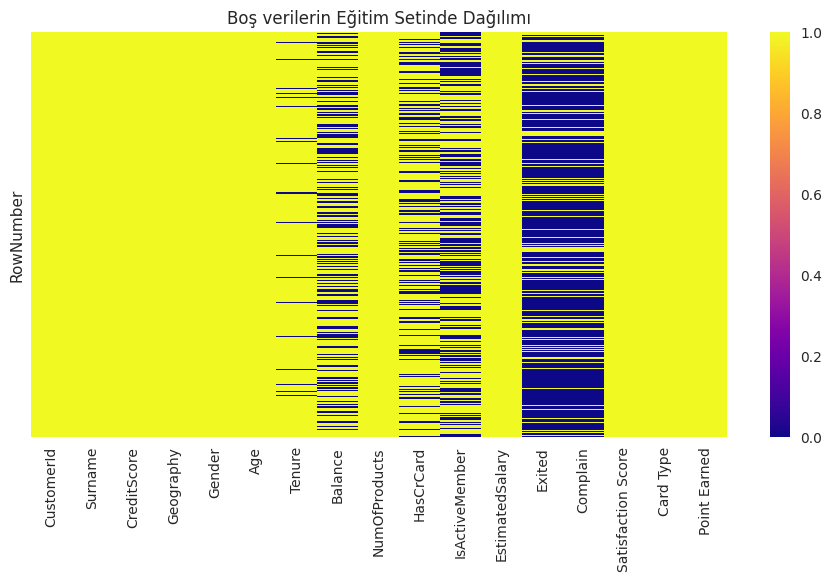

In [6]:
plt.style.use('seaborn')
plt.figure(figsize=(10,5))
sns.heatmap(df[df==0].isna(),yticklabels=False,cmap='plasma')
plt.title("Boş verilerin Eğitim Setinde Dağılımı")

In [7]:
df.shape

(10000, 17)

In [8]:
df[df==0].count()

CustomerId               0
Surname                  0
CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                 413
Balance               3617
NumOfProducts            0
HasCrCard             2945
IsActiveMember        4849
EstimatedSalary          0
Exited                7962
Complain              7956
Satisfaction Score       0
Card Type                0
Point Earned             0
dtype: int64

In [9]:
df.dtypes

CustomerId              int64
Surname                object
CreditScore             int64
Geography              object
Gender                 object
Age                     int64
Tenure                  int64
Balance               float64
NumOfProducts           int64
HasCrCard               int64
IsActiveMember          int64
EstimatedSalary       float64
Exited                  int64
Complain                int64
Satisfaction Score      int64
Card Type              object
Point Earned            int64
dtype: object

In [10]:
df = df.drop(["CustomerId","Surname"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.2+ MB


Encoding Variables

In [11]:
df["Geography"].value_counts() # Onehot encoder

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [12]:
df["Gender"].value_counts() # Label Encoder 0 1

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [13]:
df["Card Type"].value_counts() # label Encoder 0 1 2 3

Card Type
DIAMOND     2507
GOLD        2502
SILVER      2496
PLATINUM    2495
Name: count, dtype: int64

In [14]:
liste = []
yedek = list(df["Geography"].unique())
liste.extend(df.columns)
liste.remove("Geography")

In [15]:
from sklearn.preprocessing import  LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
le = LabelEncoder()
df["Card Type"] = le.fit_transform(df["Card Type"])
df["Gender"] = le.fit_transform(df["Gender"])
ct = ColumnTransformer(transformers=[("encode",OneHotEncoder(),[1])],remainder="passthrough")
dfEncoded = pd.DataFrame(data=ct.fit_transform(df))
dfEncoded.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,2.0,0.0,464.0
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,0.0,456.0
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,0.0,377.0
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,5.0,1.0,350.0
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,1.0,425.0
5,0.0,0.0,1.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0,1.0,5.0,0.0,484.0
6,1.0,0.0,0.0,822.0,1.0,50.0,7.0,0.00,2.0,1.0,1.0,10062.80,0.0,0.0,2.0,3.0,206.0
7,0.0,1.0,0.0,376.0,0.0,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0,1.0,2.0,0.0,282.0
8,1.0,0.0,0.0,501.0,1.0,44.0,4.0,142051.07,2.0,0.0,1.0,74940.50,0.0,0.0,3.0,1.0,251.0
9,1.0,0.0,0.0,684.0,1.0,27.0,2.0,134603.88,1.0,1.0,1.0,71725.73,0.0,0.0,3.0,1.0,342.0


In [16]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
RowNumber,,,,,,,,,,,,,,,
1,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,0,464
2,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,0,456
3,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,0,377
4,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,1,350
5,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,1,425
6,645,Spain,1,44,8,113755.78,2,1,0,149756.71,1,1,5,0,484
7,822,France,1,50,7,0.00,2,1,1,10062.80,0,0,2,3,206
8,376,Germany,0,29,4,115046.74,4,1,0,119346.88,1,1,2,0,282
9,501,France,1,44,4,142051.07,2,0,1,74940.50,0,0,3,1,251


In [17]:
liste = ["France","Germany","Spain"] + liste

In [18]:
dfEncoded.columns = liste
dfEncoded.head()

,France,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1.0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88,1.0,1.0,2.0,0.0,464.0
1,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,0.0,456.0
2,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,0.0,377.0
3,1.0,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63,0.0,0.0,5.0,1.0,350.0
4,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,1.0,425.0


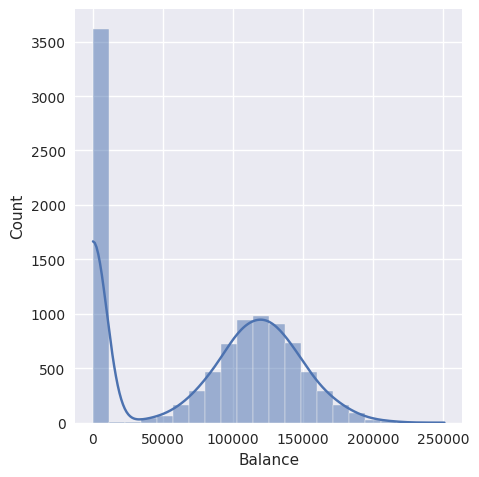

In [19]:
sns.displot(df["Balance"],kde="True")

<Axes: >

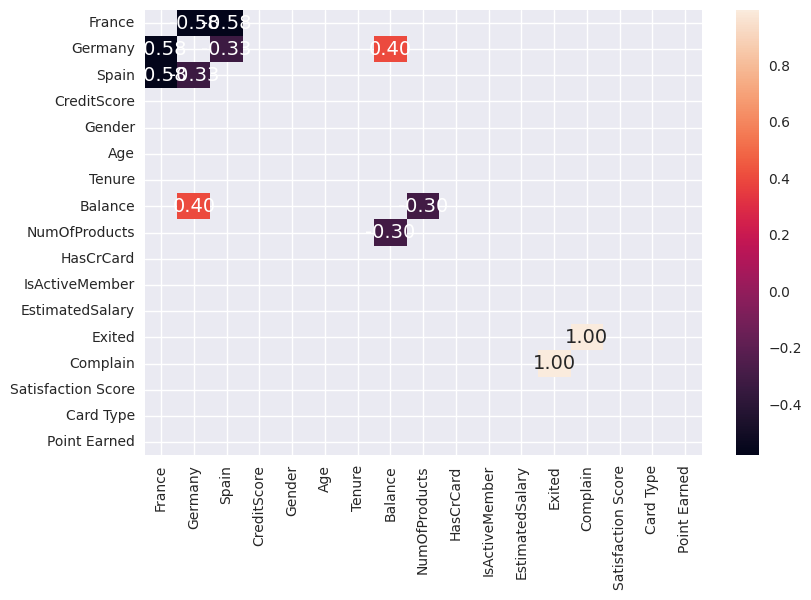

In [20]:
ornek = pd.DataFrame()
for item in dfEncoded.columns:
    if str(dfEncoded[item].dtype) != 'object':
        ornek[item] = dfEncoded[item]
corr = ornek.corr()
sns.heatmap(corr[((corr>=0.3)| (corr<=-0.3)) & (corr != 1)],annot=True,fmt='.2f')

<Axes: >

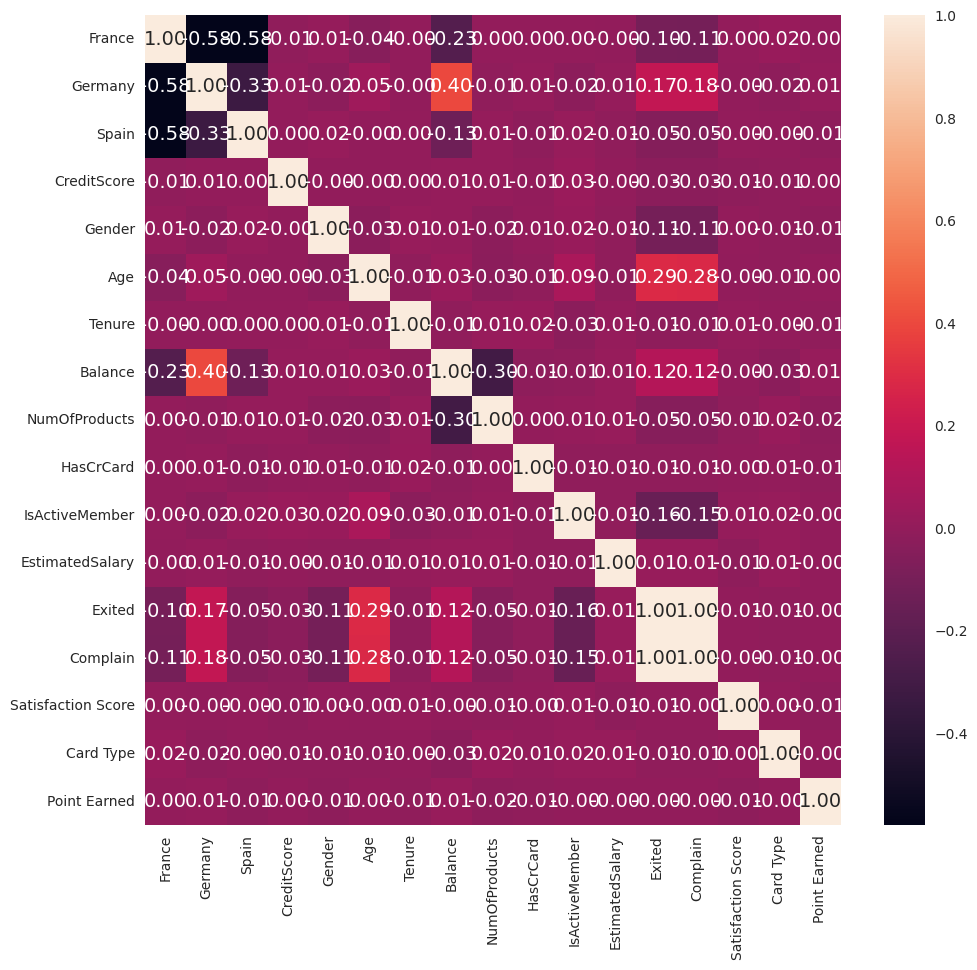

In [21]:
corr = dfEncoded.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr,annot=True,fmt=".2f")

In [22]:
dfClean = dfEncoded.drop(dfEncoded[dfEncoded["Balance"]== 0].index,axis=0)

In [23]:
dfClean.reset_index(drop=True,inplace=True)

In [24]:
dfClean.index

RangeIndex(start=0, stop=6383, step=1)

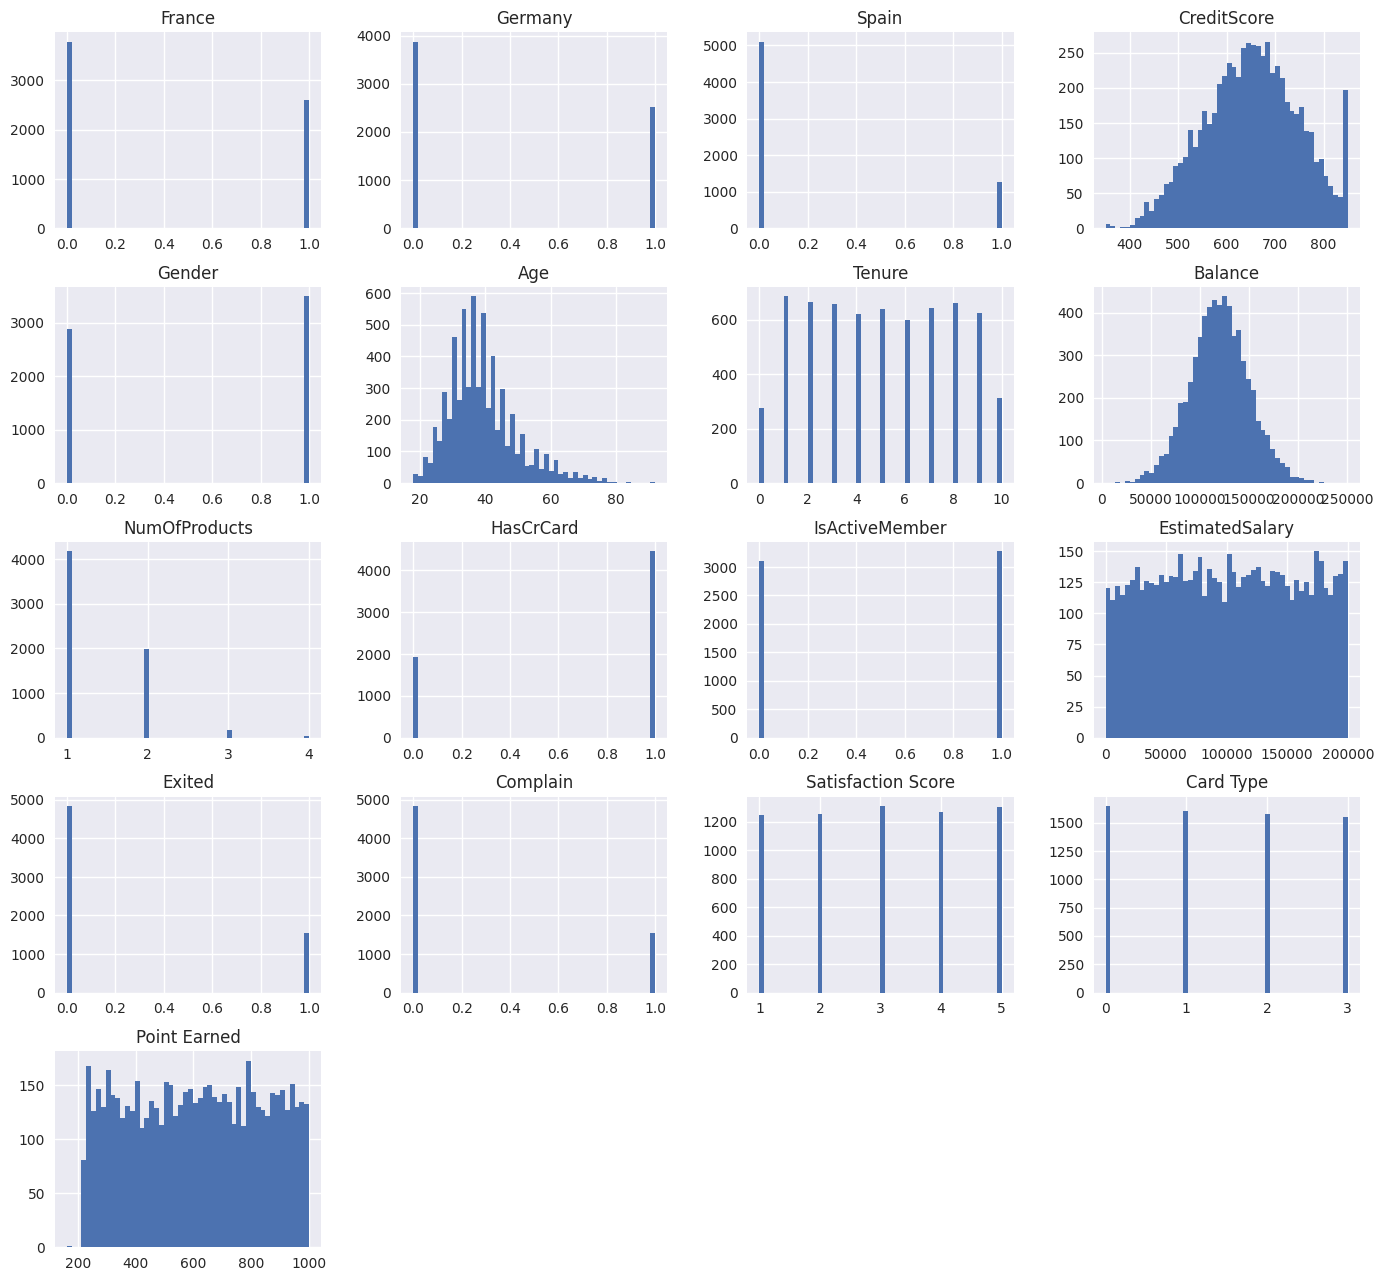

In [25]:
dfClean.hist(bins=50,figsize=(15,15));

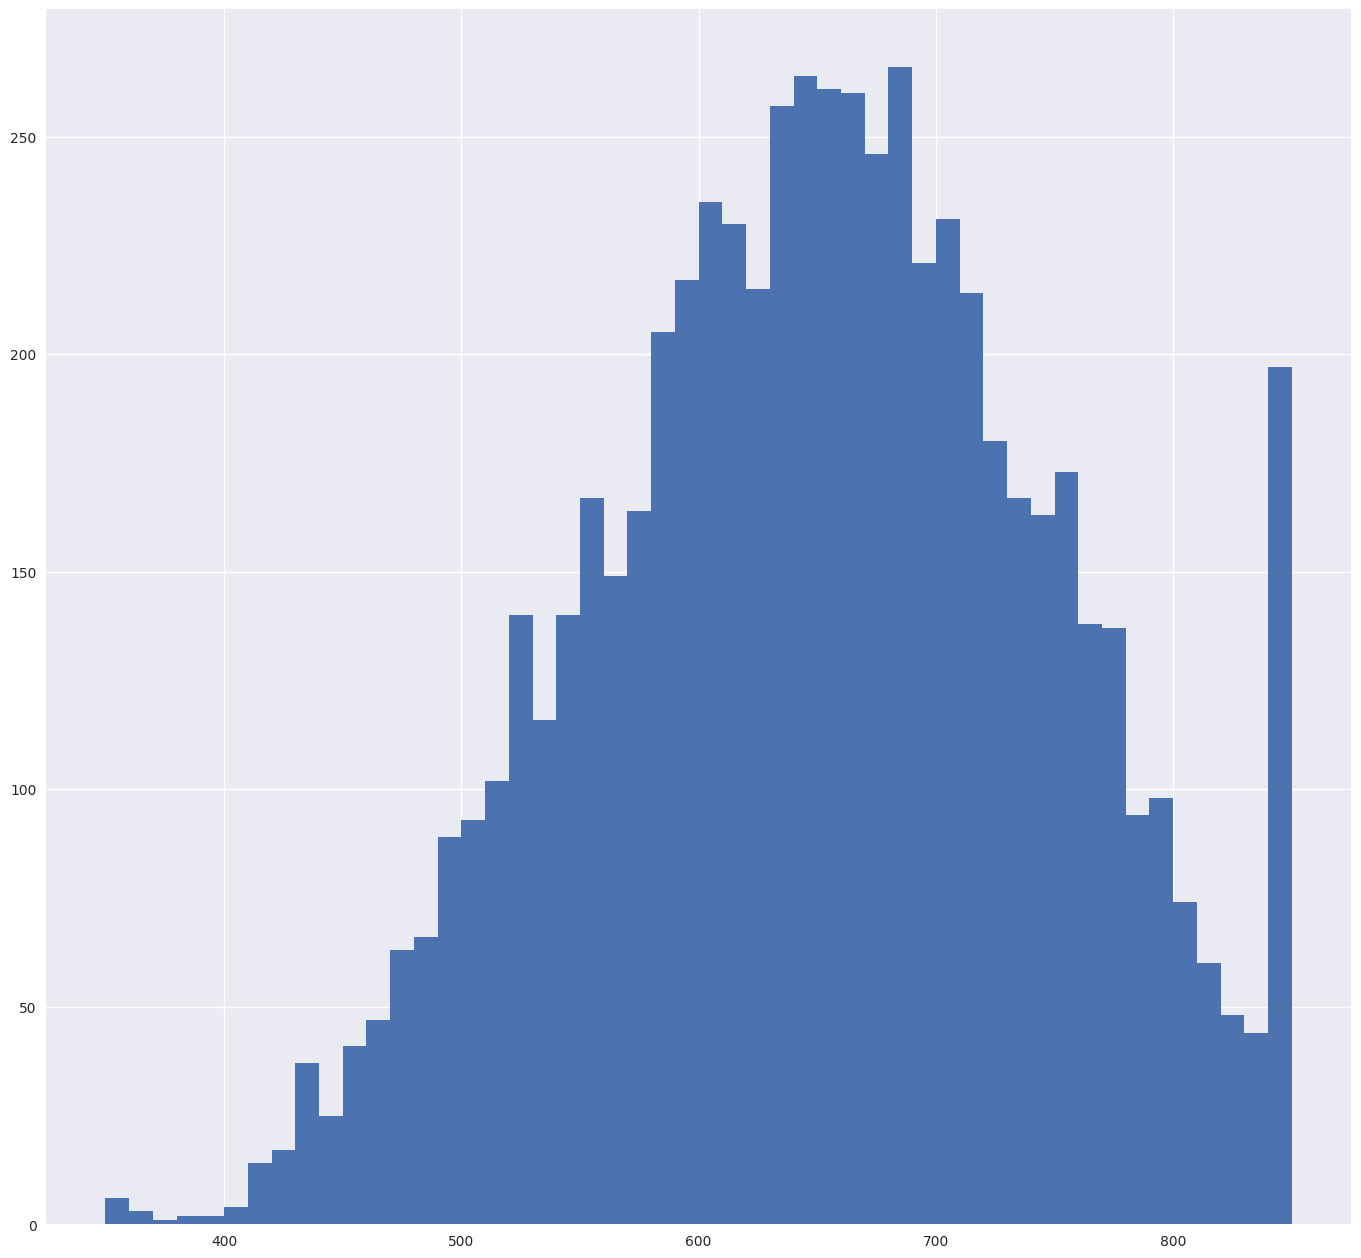

In [26]:
dfClean["CreditScore"].hist(bins=50,figsize=(15,15));

In [27]:
dfClean.describe()

,France,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,0.406705,0.393075,0.200219,651.138493,0.547392,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240953,0.241736,3.018487,1.475168,609.197556
std,0.491257,0.488472,0.400196,96.934609,0.497788,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427695,0.428169,1.411431,1.119177,226.186200
min,0.000000,0.000000,0.000000,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,0.000000,163.000000
25%,0.000000,0.000000,0.000000,584.000000,0.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000,0.000000,2.000000,0.000000,411.000000
50%,0.000000,0.000000,0.000000,652.000000,1.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000,0.000000,3.000000,1.000000,611.000000
75%,1.000000,1.000000,0.000000,718.000000,1.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000,0.000000,4.000000,2.000000,803.000000
max,1.000000,1.000000,1.000000,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,5.000000,3.000000,1000.000000


In [28]:
dfClean.head()

,France,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,0.0,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0.0,1.0,3.0,0.0,456.0
1,1.0,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1.0,1.0,3.0,0.0,377.0
2,0.0,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0.0,0.0,5.0,1.0,425.0
3,0.0,0.0,1.0,645.0,1.0,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1.0,1.0,5.0,0.0,484.0
4,0.0,1.0,0.0,376.0,0.0,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1.0,1.0,2.0,0.0,282.0


In [29]:
dfClean.describe()

,France,Germany,Spain,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000,6383.000000
mean,0.406705,0.393075,0.200219,651.138493,0.547392,39.197713,4.979633,119827.493793,1.386025,0.699201,0.513552,100717.352956,0.240953,0.241736,3.018487,1.475168,609.197556
std,0.491257,0.488472,0.400196,96.934609,0.497788,10.476208,2.909514,30095.056462,0.577011,0.458641,0.499855,57380.316584,0.427695,0.428169,1.411431,1.119177,226.186200
min,0.000000,0.000000,0.000000,350.000000,0.000000,18.000000,0.000000,3768.690000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,1.000000,0.000000,163.000000
25%,0.000000,0.000000,0.000000,584.000000,0.000000,32.000000,2.000000,100181.975000,1.000000,0.000000,0.000000,51736.850000,0.000000,0.000000,2.000000,0.000000,411.000000
50%,0.000000,0.000000,0.000000,652.000000,1.000000,38.000000,5.000000,119839.690000,1.000000,1.000000,1.000000,101139.300000,0.000000,0.000000,3.000000,1.000000,611.000000
75%,1.000000,1.000000,0.000000,718.000000,1.000000,44.000000,8.000000,139512.290000,2.000000,1.000000,1.000000,149596.615000,0.000000,0.000000,4.000000,2.000000,803.000000
max,1.000000,1.000000,1.000000,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199970.740000,1.000000,1.000000,5.000000,3.000000,1000.000000


In [30]:
# out=[]
# def iqr_outliers(column):
#     q1 = column.quantile(0.25)
#     q3 = column.quantile(0.75)
#     iqr = q3-q1
#     Lower_tail = q1 - 1.5 * iqr
#     Upper_tail = q3 + 1.5 * iqr
#     for i in column:
#         if i > Upper_tail or i < Lower_tail:
#             out.append(i)
#     return out
# # for item in dfClean.columns:
# #     dfClean.drop(dfClean[dfClean[item].isin(iqr_outliers(dfClean[item]))].index,axis=0,inplace=True)
# # dfClean.shape

Split Label and Features

In [31]:
y = dfClean["Card Type"].values
X = dfClean.drop("Card Type",axis=1).values

In [32]:
dfClean["Card Type"].value_counts()

Card Type
0.0    1648
1.0    1607
2.0    1575
3.0    1553
Name: count, dtype: int64

Train  Test Splitting

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)

In [35]:
pd.DataFrame(data=X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.0,0.0,0.0,641.0,0.0,36.0,5.0,66392.64,1.0,1.0,0.0,31106.67,0.0,0.0,1.0,224.0
1,1.0,0.0,0.0,661.0,1.0,51.0,6.0,146606.60,1.0,1.0,1.0,68021.90,0.0,0.0,5.0,259.0
2,1.0,0.0,0.0,603.0,1.0,43.0,5.0,127823.93,1.0,1.0,1.0,19483.35,0.0,0.0,1.0,711.0
3,0.0,1.0,0.0,708.0,1.0,37.0,8.0,153366.13,1.0,1.0,1.0,26912.34,0.0,0.0,2.0,682.0
4,0.0,1.0,0.0,727.0,1.0,34.0,2.0,146407.11,1.0,1.0,1.0,72073.72,0.0,0.0,2.0,647.0


In [36]:
pd.DataFrame(data=X_train_scaled).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1.218471,-0.808061,-0.503914,-0.105944,-1.098439,-0.310171,0.010844,-1.774217,-0.6723,0.656241,-1.034273,-1.214682,-0.56574,-0.566645,-1.431427,-1.689785
1,1.218471,-0.808061,-0.503914,0.100089,0.910383,1.115159,0.352623,0.887890,-0.6723,0.656241,0.966863,-0.572470,-0.56574,-0.566645,1.403665,-1.535872
2,1.218471,-0.808061,-0.503914,-0.497406,0.910383,0.354983,0.010844,0.264539,-0.6723,0.656241,0.966863,-1.416892,-0.56574,-0.566645,-1.431427,0.451797
3,-0.820701,1.237531,-0.503914,0.584266,0.910383,-0.215149,1.036182,1.112223,-0.6723,0.656241,0.966863,-1.287650,-0.56574,-0.566645,-0.722654,0.324269
4,-0.820701,1.237531,-0.503914,0.779997,0.910383,-0.500214,-1.014494,0.881270,-0.6723,0.656241,0.966863,-0.501980,-0.56574,-0.566645,-0.722654,0.170357


In [37]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
from sklearn.svm import SVC
model = SVC()
kfold = KFold(shuffle=True,random_state=42,n_splits=10)
cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kfold)
print(*cv_results,sep="\n")

0.2563600782778865
0.24070450097847357
0.2622309197651663
0.2700587084148728
0.23483365949119372
0.24070450097847357
0.24313725490196078
0.24705882352941178
0.2568627450980392
0.2549019607843137


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor

In [39]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC()))
models.append(('LSVC', LinearSVC()))
models.append(('RFC', RandomForestClassifier()))
models.append(('DTR', DecisionTreeRegressor()))

In [40]:
import warnings
warnings.filterwarnings("ignore")

In [41]:
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
seed = 7 
sonuclar = []
isimler = []
for isim,model in models:
    kfold = KFold(shuffle=True,random_state=42,n_splits=5)
    cv_results = cross_val_score(model,X_train,y_train,scoring="accuracy",cv=kfold)
    sonuclar.append(cv_results)
    isimler.append(isim)
    print(f"{isim} {cv_results.mean()} {cv_results.std()}")

LR 0.2516651301149443 0.002102831345160138
KNN 0.24911649873210523 0.00852967510800937
NB 0.24970722460425007 0.0058846509293388
SVC 0.25009631400089316 0.008791025809311959
LSVC 0.23599632760943856 0.008788873520389909
RFC 0.25989063329570217 0.006700011273326032
DTR 0.25558266616321434 0.024484055131899152


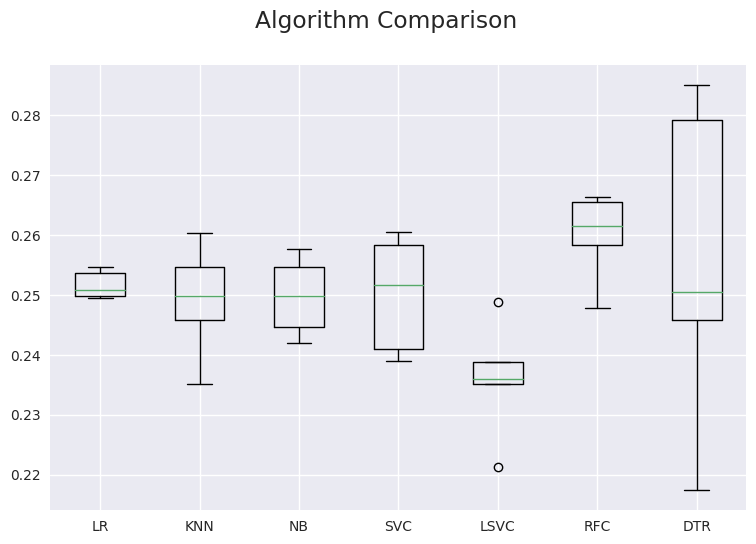

In [42]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(sonuclar)
ax.set_xticklabels(isimler)
plt.show()

In [43]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
random_grid



{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

model = RandomForestClassifier()
rf_random = RandomizedSearchCV(model,random_grid, n_iter = 20,cv = 5,random_state=42)
rf_random.fit(X_train,y_train)

In [ ]:
rf_random.best_score_

In [ ]:
modelSon = rf_random.best_estimator_

In [ ]:
rf_random.best_params_